# Supervised Learning Capstone Project

For this capstone, I have chosen to work on a dataset gathered by the Department of Forest Sciences at the College of Natural Resources of the Colorado State University and published on UCI. This data set was put together by Jock A. Blackard, Dr. Denis J. Dean and Dr. Charles W. Anderson. It contains 581k observations over 55 variables. Our target feature is Cover_Type.

More information on the Data set can be found here:
http://archive.ics.uci.edu/ml/datasets/Covertype

Information about how Hillshade index is calculated:
https://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/how-hillshade-works.htm#GUID-E6B31ED3-51F8-4C1C-AB55-2D6C65278F44

# Introduction

The challenges that our world's natural environment is facing are incredible. From global warming to farming for an ever growing population while maintaining balance and habitat for wild life are all essential problematics. However, there is still much progress to be made in understanding the synergetic relationships between the different elements that make a bio diverse environment. Data sciences can help the environmental sciences by bringing it's wealth of knowledge on aggregating and organizing data to extract meaningful learnings (more on this topic in this article: https://www.frontiersin.org/articles/10.3389/fenvs.2019.00121/full). 

In this project, I will use supervised learnings models to attempt to accurately predict the cover type, ie the type of trees that grow in forests, based on the set of features provided which ranges from soil attributes, to hillshade (an index that provides an evaluation of the amount of sun light that an area receives through out the day), slopes, elevation and distance to water.

First, I will conduct an EDA. I will then apply and evaluate various classification models and finally choose the best performing model. 

In [1]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn import ensemble, tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA

from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df = pd.read_csv(r'C:\Users\riesn\Desktop\covtype_csv.csv')

# Part 1: Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Rawah                                 581012 non-null int64
Neota                                 581012 non-null int64
Comanche                              581012 non-null int64
Cache_La_Poudre                       581012 non-null int64
Soil_Type_1                           581012 non-

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche,Cache_La_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche,Cache_La_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [6]:
def eda(dataframe):
    print('MISSING VALUES % of total \n', dataframe.isnull().sum()*100/dataframe.isnull().count())
    print('\n 0 Values \n', dataframe.isin([0]).sum())
    for item in dataframe:
        print('\n UNIQUE VALUE TOTALS \n',item)
        print(dataframe[item].nunique())
        print(dataframe[item].value_counts())     
eda(df)


MISSING VALUES % of total 
 Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Rawah                                 0.0
Neota                                 0.0
Comanche                              0.0
Cache_La_Poudre                       0.0
Soil_Type_1                           0.0
Soil_Type_2                           0.0
Soil_Type_3                           0.0
Soil_Type_4                           0.0
Soil_Type_5                           0.0
Soil_Type_6                           0.0
Soil_Type_7                           0.0
Soil_Type_8                           0.0
Soil_Type_9                           0.0
Soil_T

Name: Hillshade_Noon, dtype: int64

 UNIQUE VALUE TOTALS 
 Hillshade_3pm
255
143    7333
145    7217
138    7065
146    6915
142    6902
136    6871
139    6858
135    6781
149    6723
132    6673
150    6641
140    6601
129    6402
144    6341
137    6283
152    6270
141    6263
148    6218
128    6201
134    6187
156    6181
153    6112
147    6052
151    5987
131    5980
121    5959
133    5937
125    5925
124    5859
154    5834
127    5769
130    5745
155    5544
126    5496
166    5447
120    5438
159    5375
157    5203
160    5189
162    5042
158    5018
161    4984
118    4967
117    4963
119    4940
163    4909
122    4907
123    4902
110    4771
165    4761
169    4744
168    4631
164    4628
173    4535
116    4485
172    4455
113    4440
175    4411
176    4403
170    4346
114    4302
115    4265
179    4224
171    4139
167    4137
178    4054
182    3835
112    3735
109    3725
181    3719
107    3708
174    3694
111    3684
108    3676
187    3615
180    3604
183    3575

Name: Soil_Type_2, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_3
2
0    576189
1      4823
Name: Soil_Type_3, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_4
2
0    568616
1     12396
Name: Soil_Type_4, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_5
2
0    579415
1      1597
Name: Soil_Type_5, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_6
2
0    574437
1      6575
Name: Soil_Type_6, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_7
2
0    580907
1       105
Name: Soil_Type_7, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_8
2
0    580833
1       179
Name: Soil_Type_8, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_9
2
0    579865
1      1147
Name: Soil_Type_9, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_10
2
0    548378
1     32634
Name: Soil_Type_10, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_11
2
0    568602
1     12410
Name: Soil_Type_11, dtype: int64

 UNIQUE VALUE TOTALS 
 Soil_Type_12
2
0    551041
1     29971
Name: Soil_Type_12, dtype: int64

 UNIQUE VALUE TOTALS 

### From the initial exploration, we know the following:
- There are no null values in the dataset
- Vertical_Distance_to_Hydrology is the only variable with negative values
- 44 out of the 55 variables are binary
- 10 variables are continuous
- Our target variable is categorical
- Hillshade index captures the amount of light an area receives during the day. It ranges from 0 to 255. In our data set, the max is 254 and our min is 0. A high value means the area receives a lot of sun light, a low value means the area is shaded.

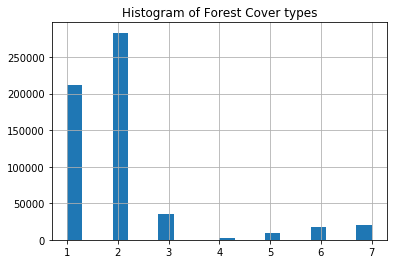

In [7]:
#distribution of our target variable
df.Cover_Type.hist(bins=20)
plt.title('Histogram of Forest Cover types')
plt.show()

##### Our target variable is distributed with a heavy lean on cover types 1 and 2 (85% of the observations). This class imbalance could affect our model's ability to predict well for the other cover types.

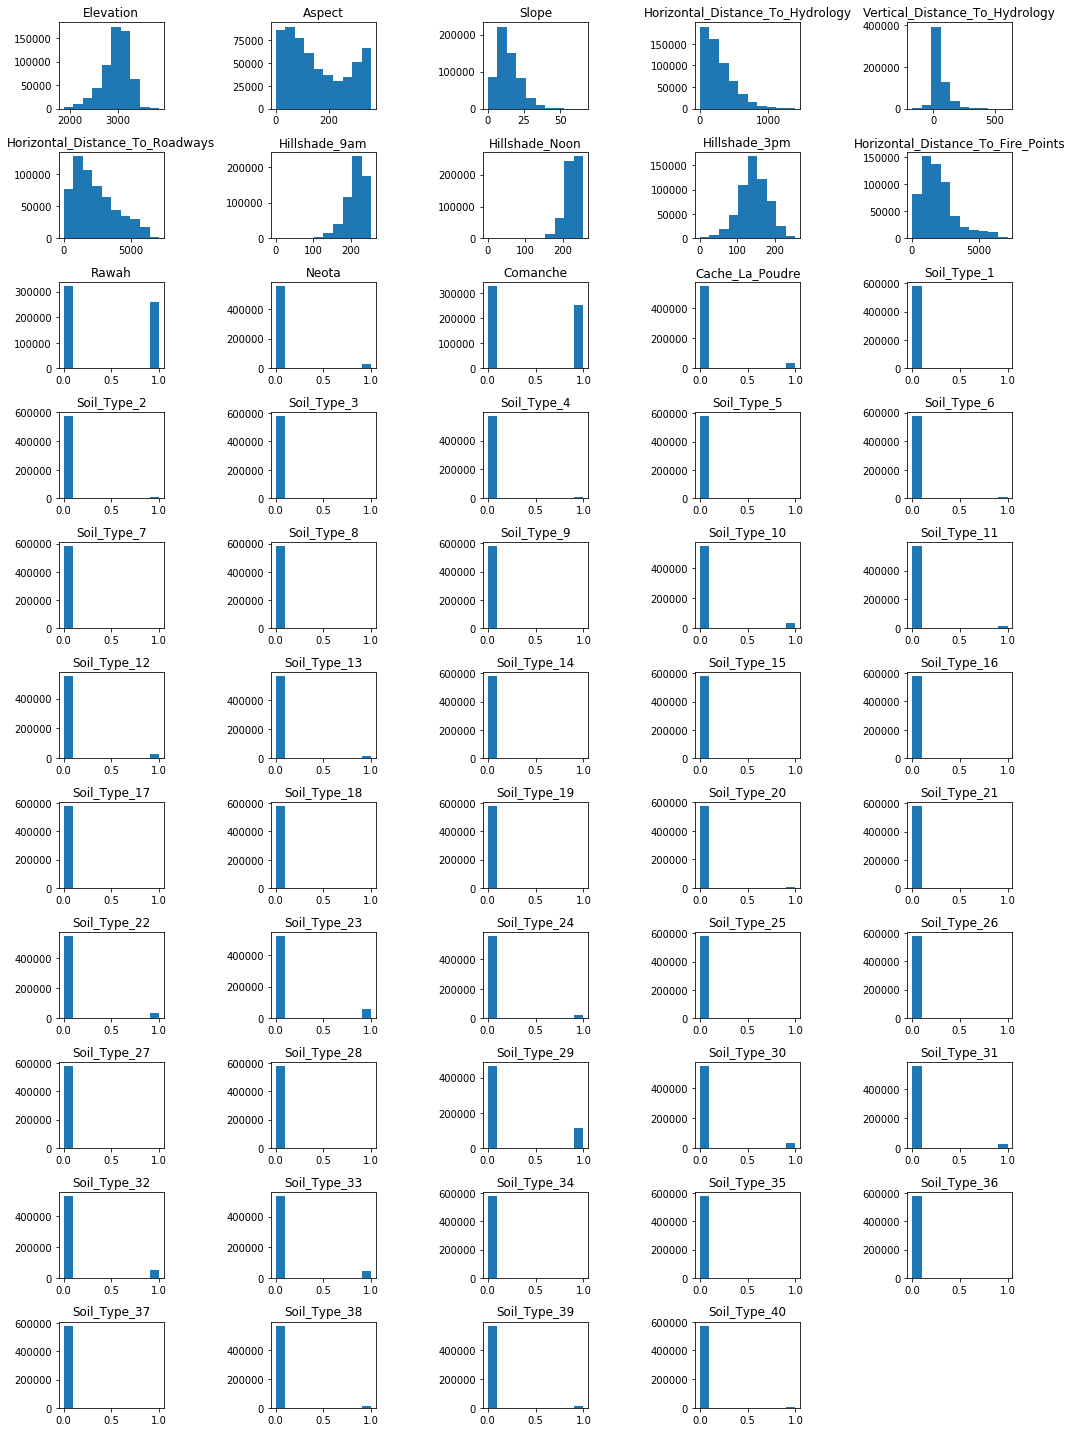

In [8]:
# plotting the distribution of our variables

variables = df.select_dtypes(include=['int64'])
variables.drop(['Cover_Type'], 1, inplace=True)

plt.figure(figsize=(15, 20))
for i, col in enumerate(variables, 1):
    plt.subplot(11, 5, i)
    plt.hist(df[col])
    plt.title(col)
    plt.tight_layout()

In [9]:
#Looking at the difference in mean for the different cover types
df.groupby("Cover_Type").mean()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche,Cache_La_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
Cover_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3128.644888,156.138227,13.127110,270.555245,42.156939,2614.834517,211.998782,223.430211,143.875038,2009.253517,0.499042,0.087779,0.413180,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000203,0.00076,0.004513,0.003526,0.012712,0.010371,0.000000,0.000000,0.003002,0.001010,0.000330,0.011617,0.017546,0.003795,0.121710,0.167848,0.052700,0.000590,0.001336,0.002851,0.000203,0.197843,0.036084,0.056000,0.100821,0.085668,0.000444,0.004395,0.000066,0.000000,0.041206,0.037207,0.022781
2,2920.936061,152.060515,13.550499,279.916442,45.884219,2429.530799,213.844423,225.326596,142.983466,2168.154849,0.516048,0.031715,0.441555,0.010681,0.000000,0.003007,0.004204,0.011475,0.000000,0.003219,0.000371,0.000480,0.00348,0.038133,0.032040,0.096286,0.046798,0.000000,0.000000,0.006152,0.003378,0.005856,0.005259,0.018380,0.000074,0.026269,0.073282,0.034246,0.001232,0.007674,0.001592,0.003145,0.252025,0.071366,0.046625,0.104327,0.089333,0.005051,0.000042,0.000148,0.000000,0.002612,0.001264,0.001172
3,2394.509845,176.372490,20.770208,210.276473,62.446915,943.940734,201.918415,215.826537,140.367176,910.955949,0.000000,0.000000,0.399955,0.600045,0.058763,0.139593,0.067433,0.209795,0.027046,0.111680,0.000000,0.000000,0.00000,0.322537,0.037842,0.000000,0.001147,0.003244,0.000000,0.003608,0.014152,0.000000,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002965,0.000140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2223.939934,137.139425,18.528941,106.934838,41.186749,914.199490,228.345832,216.997088,111.392792,859.124135,0.000000,0.000000,0.000000,1.000000,0.064798,0.041864,0.370586,0.061158,0.017474,0.116491,0.000000,0.000000,0.00000,0.081544,0.012377,0.000000,0.000000,0.056425,0.000000,0.018566,0.158719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2787.417571,139.283051,16.641315,212.354893,50.610344,1349.765722,223.474876,219.035816,121.920889,1577.719794,0.398293,0.000000,0.601707,0.000000,0.000000,0.027810,0.000000,0.061624,0.000000,0.000000,0.000000,0.000000,0.00000,0.027389,0.071737,0.000000,0.138523,0.000000,0.000000,0.003687,0.063204,0.017908,0.007058,0.005583,0.000000,0.000000,0.073633,0.007374,0.000000,0.013905,0.000000,0.001264,0.119246,0.222374,0.032550,0.048457,0.054567,0.002107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2419.181897,180.539068,19.048886,159.853458,45.437439,1037.169805,192.844302,209.827662,148.284044,1055.351471,0.000000,0.000000,0.439109,0.560891,0.043301,0.075027,0.011689,0.036333,0.033512,0.077734,0.000000,0.000000,0.00000,0.510105,0.029827,0.000000,0.035354,0.018886,0.000173,0.014453,0.040825,0.000000,0.000000,0.016123,0.000000,0.000000,0.001670,0.007946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003628,0.011516,0.031036,0.000864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,3361.928669,153.236226,14.255924,356.994686,69.474305,2738.250463,216.967723,221.746026,134.932033,2070.031594,0.248708,0.112335,0.638957,0.000

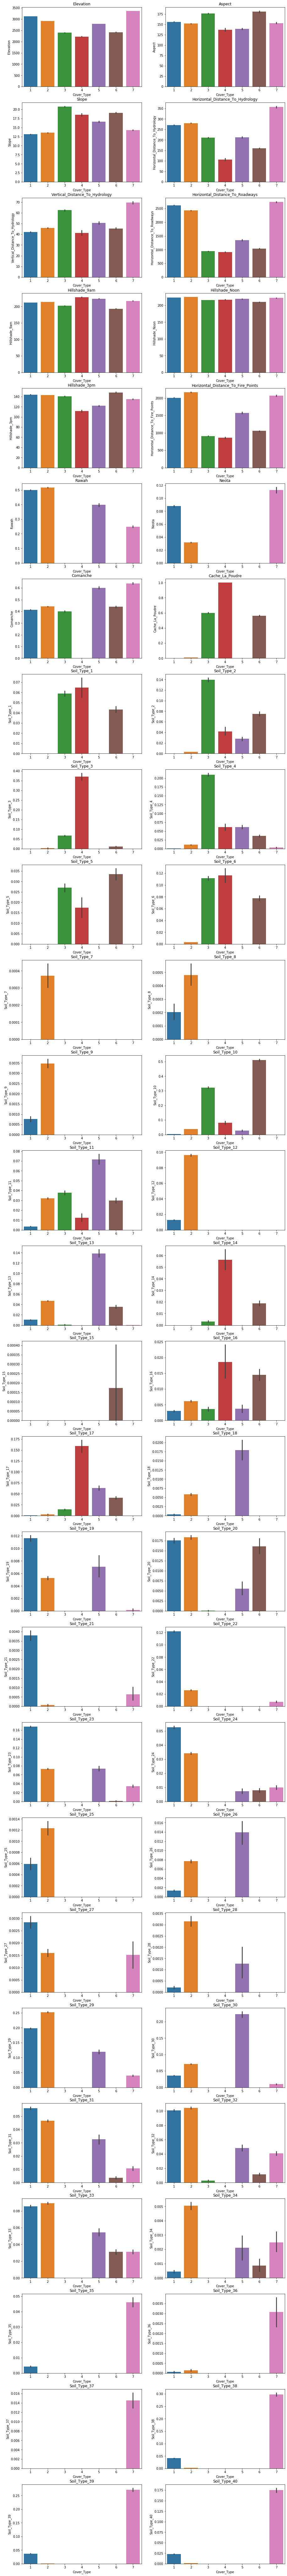

In [10]:
# Visual illustration

plt.figure(figsize=(15, 150))
for i, col in enumerate(variables, 1):
    plt.subplot(27, 2, i)
    sns.barplot(df["Cover_Type"], df[col])
    plt.title(col)
    
plt.show()

###### From visual inspection, I can see that there are some differences within the variables for each covertype.

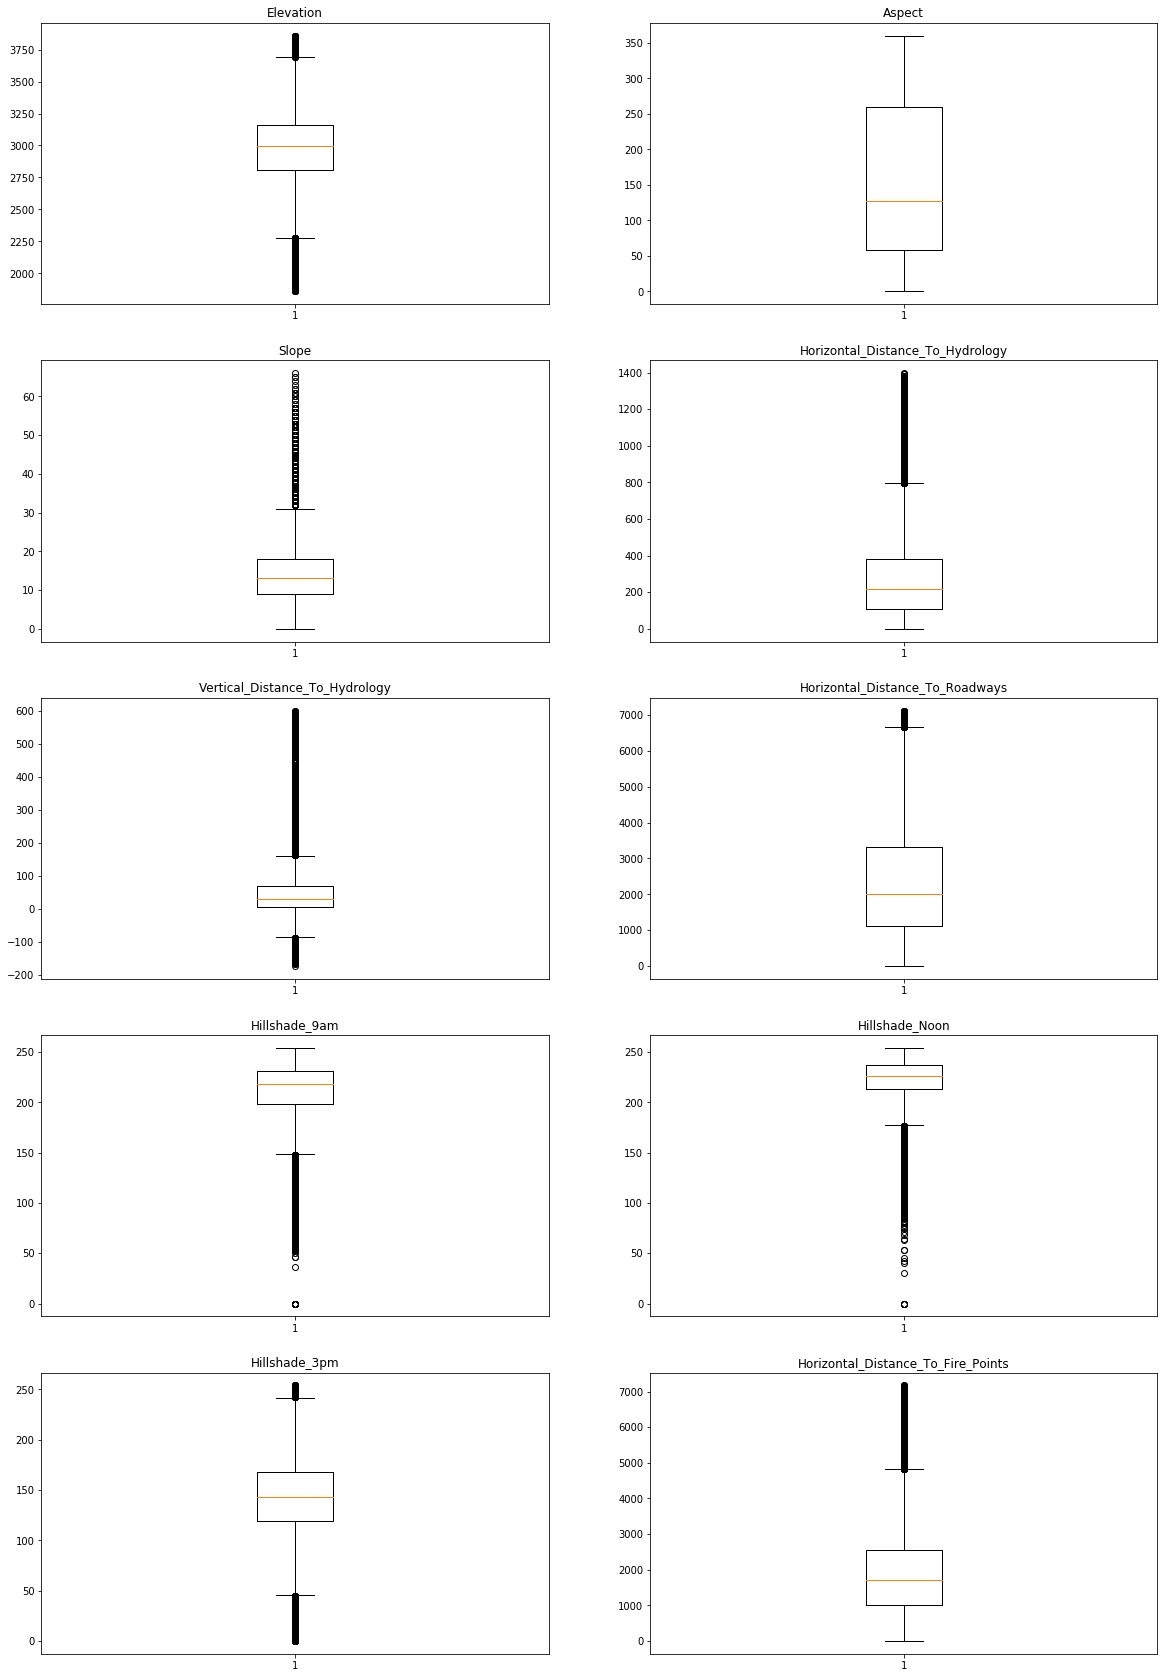

In [11]:
#looking for outliers in our continuous variables

cont_variables =['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(20,30))

for i, col in enumerate(cont_variables, 1):
                     plt.subplot(5,2,i)
                     plt.boxplot(df[col],whis=1.5)
                     plt.title(col)

plt.show()

In [12]:
#Applying Tukey's method to quantify the number of outliers in our dataset
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    
for col in cont_variables:
    outlier_count(col)

---------------Elevation---------------
Number of outliers: 15569
Percent of data that is outlier: 2.68%
---------------Aspect---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------Slope---------------
Number of outliers: 15316
Percent of data that is outlier: 2.64%
---------------Horizontal_Distance_To_Hydrology---------------
Number of outliers: 14557
Percent of data that is outlier: 2.51%
---------------Vertical_Distance_To_Hydrology---------------
Number of outliers: 31463
Percent of data that is outlier: 5.42%
---------------Horizontal_Distance_To_Roadways---------------
Number of outliers: 669
Percent of data that is outlier: 0.12%
---------------Hillshade_9am---------------
Number of outliers: 17433
Percent of data that is outlier: 3.0%
---------------Hillshade_Noon---------------
Number of outliers: 15672
Percent of data that is outlier: 2.7%
---------------Hillshade_3pm---------------
Number of outliers: 7832
Percent of data that is outlier:

We will treat outliers for each variable except 'Aspect' using the winsorize method

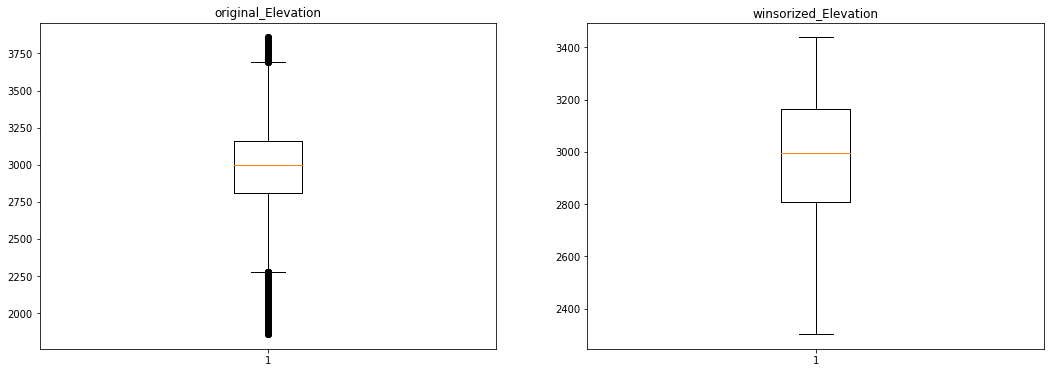

In [13]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Elevation = df['Elevation']
plt.boxplot(original_Elevation)
plt.title("original_Elevation")

plt.subplot(1,2,2)
winsorized_Elevation = winsorize(df['Elevation'],(0.03,0.01))
plt.boxplot(winsorized_Elevation)
plt.title("winsorized_Elevation")

plt.show()

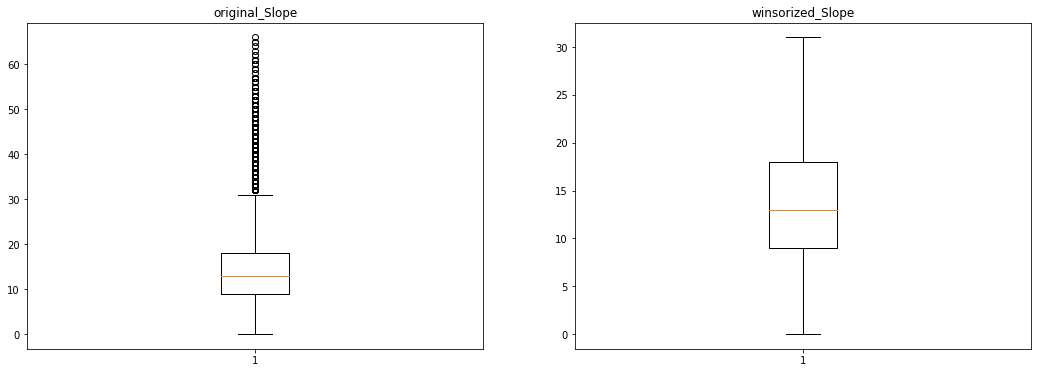

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Slope = df['Slope']
plt.boxplot(original_Slope)
plt.title("original_Slope")

plt.subplot(1,2,2)
winsorized_Slope = winsorize(df['Slope'],(0,0.03))
plt.boxplot(winsorized_Slope)
plt.title("winsorized_Slope")

plt.show()

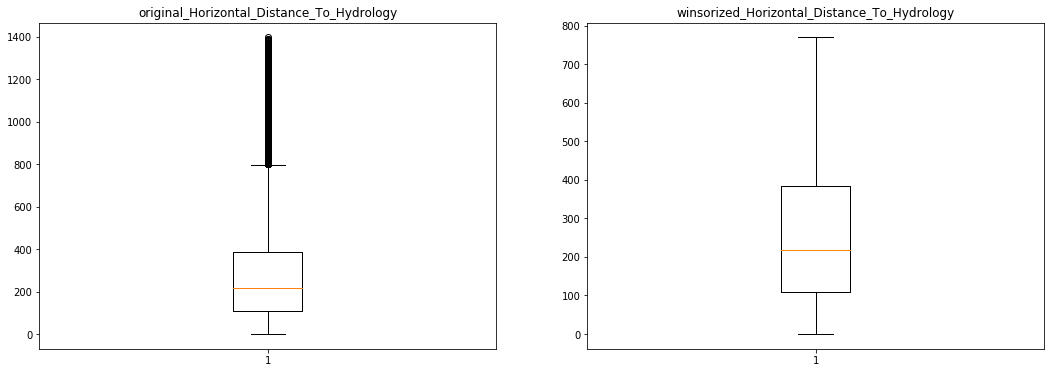

In [15]:

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Horizontal_Distance_To_Hydrology = df['Horizontal_Distance_To_Hydrology']
plt.boxplot(original_Horizontal_Distance_To_Hydrology)
plt.title("original_Horizontal_Distance_To_Hydrology")

plt.subplot(1,2,2)
winsorized_Horizontal_Distance_To_Hydrology = winsorize(df['Horizontal_Distance_To_Hydrology'],(0,0.03))
plt.boxplot(winsorized_Horizontal_Distance_To_Hydrology)
plt.title("winsorized_Horizontal_Distance_To_Hydrology")

plt.show()

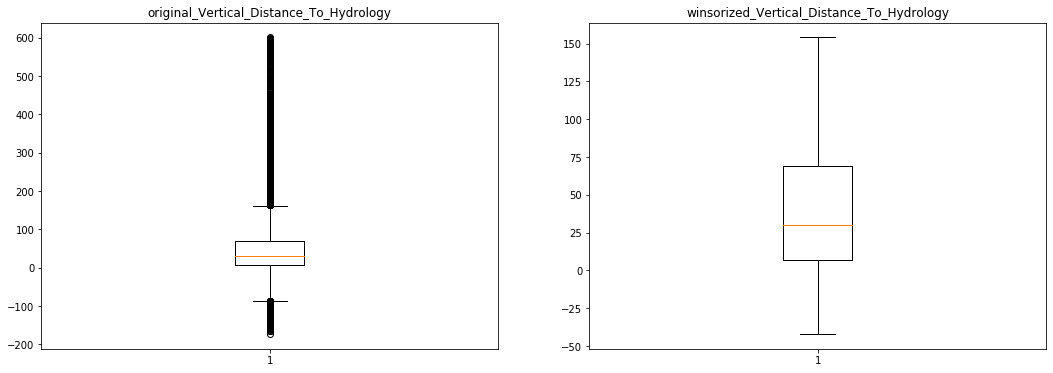

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Vertical_Distance_To_Hydrology = df['Vertical_Distance_To_Hydrology']
plt.boxplot(original_Vertical_Distance_To_Hydrology)
plt.title("original_Vertical_Distance_To_Hydrology")

plt.subplot(1,2,2)
winsorized_Vertical_Distance_To_Hydrology = winsorize(df['Vertical_Distance_To_Hydrology'],(0.01,0.06))
plt.boxplot(winsorized_Vertical_Distance_To_Hydrology)
plt.title("winsorized_Vertical_Distance_To_Hydrology")

plt.show()

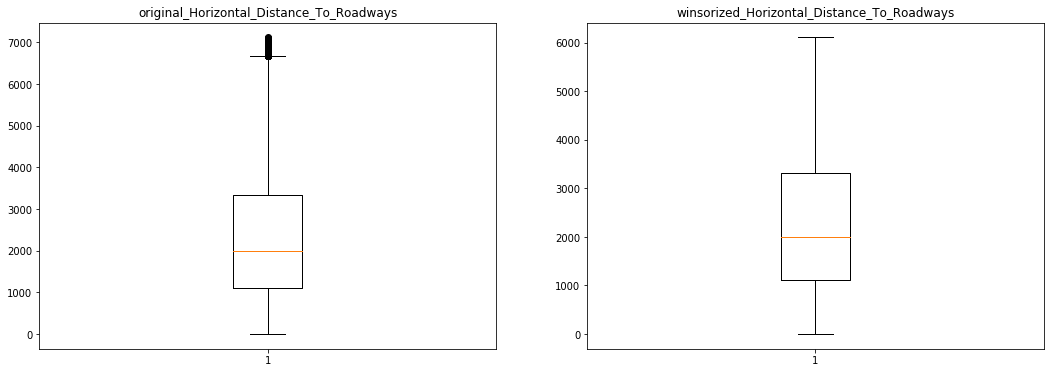

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Horizontal_Distance_To_Roadways = df['Horizontal_Distance_To_Roadways']
plt.boxplot(original_Horizontal_Distance_To_Roadways)
plt.title("original_Horizontal_Distance_To_Roadways")

plt.subplot(1,2,2)
winsorized_Horizontal_Distance_To_Roadways = winsorize(df['Horizontal_Distance_To_Roadways'],(0,0.01))
plt.boxplot(winsorized_Horizontal_Distance_To_Roadways)
plt.title("winsorized_Horizontal_Distance_To_Roadways")

plt.show()

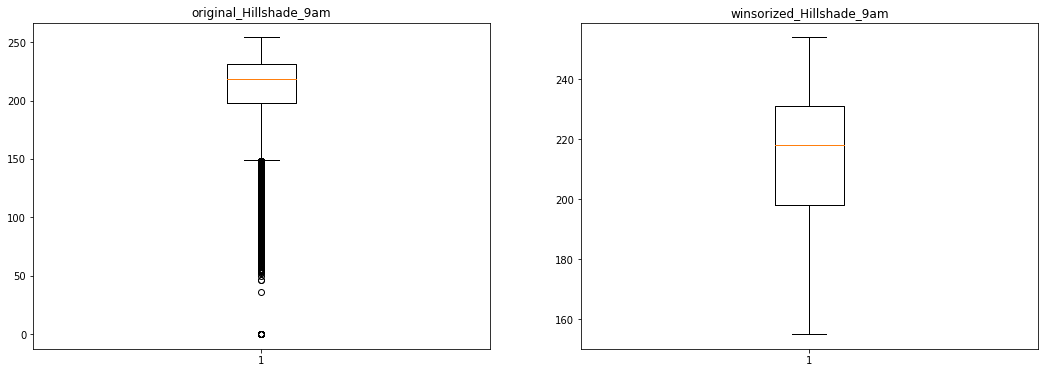

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Hillshade_9am = df['Hillshade_9am']
plt.boxplot(original_Hillshade_9am)
plt.title("original_Hillshade_9am")

plt.subplot(1,2,2)
winsorized_Hillshade_9am = winsorize(df['Hillshade_9am'],(0.04,0))
plt.boxplot(winsorized_Hillshade_9am)
plt.title("winsorized_Hillshade_9am")

plt.show()

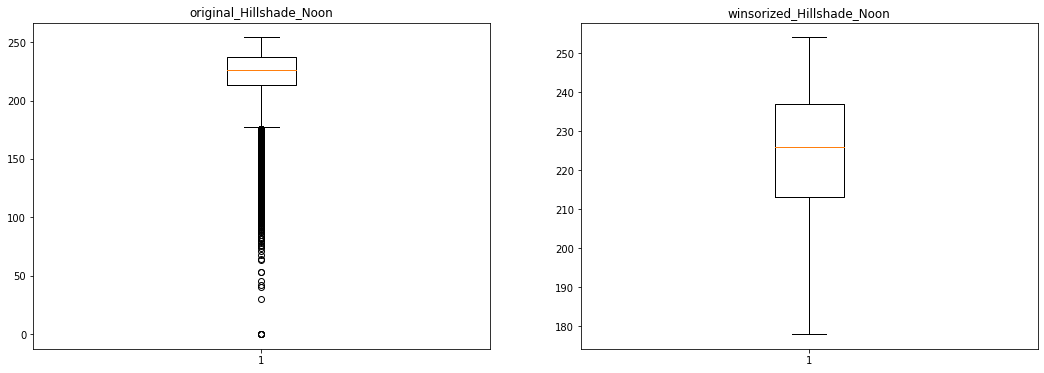

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Hillshade_Noon = df['Hillshade_Noon']
plt.boxplot(original_Hillshade_Noon)
plt.title("original_Hillshade_Noon")

plt.subplot(1,2,2)
winsorized_Hillshade_Noon = winsorize(df['Hillshade_Noon'],(0.03,0))
plt.boxplot(winsorized_Hillshade_Noon)
plt.title("winsorized_Hillshade_Noon")

plt.show()

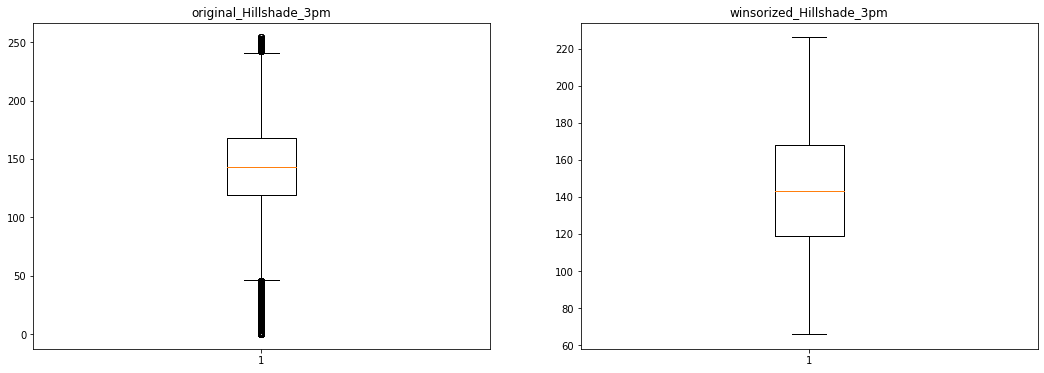

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Hillshade_3pm = df['Hillshade_3pm']
plt.boxplot(original_Hillshade_3pm)
plt.title("original_Hillshade_3pm")

plt.subplot(1,2,2)
winsorized_Hillshade_3pm = winsorize(df['Hillshade_3pm'],(0.03,0.01))
plt.boxplot(winsorized_Hillshade_3pm)
plt.title("winsorized_Hillshade_3pm")

plt.show()

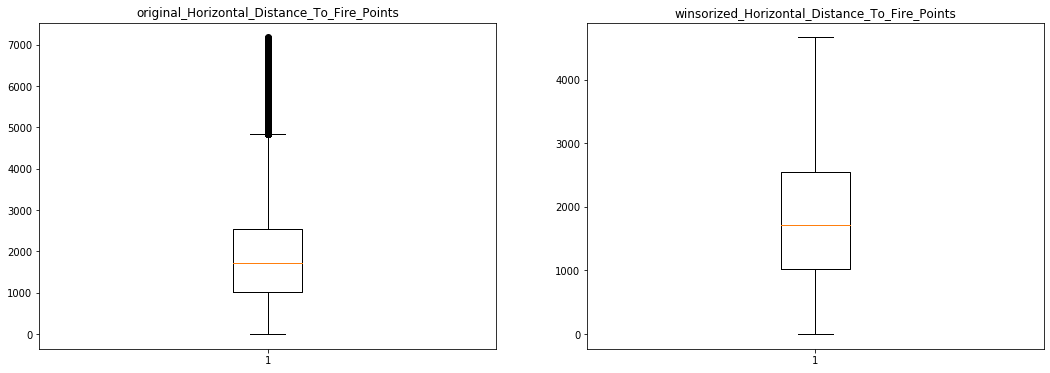

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Horizontal_Distance_To_Fire_Points = df['Horizontal_Distance_To_Fire_Points']
plt.boxplot(original_Horizontal_Distance_To_Fire_Points)
plt.title("original_Horizontal_Distance_To_Fire_Points")

plt.subplot(1,2,2)
winsorized_Horizontal_Distance_To_Fire_Points = winsorize(df['Horizontal_Distance_To_Fire_Points'],(0,0.06))
plt.boxplot(winsorized_Horizontal_Distance_To_Fire_Points)
plt.title("winsorized_Horizontal_Distance_To_Fire_Points")

plt.show()

In [22]:
#creating a new DF with the winsorized continuous variables

df_win=df.copy()

df_win['winsorized_Elevation'] = winsorized_Elevation
df_win['winsorized_Slope'] = winsorized_Slope
df_win['winsorized_Horizontal_Distance_To_Hydrology'] = winsorized_Horizontal_Distance_To_Hydrology
df_win['winsorized_Vertical_Distance_To_Hydrology'] = winsorized_Vertical_Distance_To_Hydrology
df_win['winsorized_Horizontal_Distance_To_Roadways'] = winsorized_Horizontal_Distance_To_Roadways
df_win['winsorized_Hillshade_9am'] = winsorized_Hillshade_9am
df_win['winsorized_Hillshade_Noon'] = winsorized_Hillshade_Noon
df_win['winsorized_Hillshade_3pm'] = winsorized_Hillshade_3pm
df_win['winsorized_Horizontal_Distance_To_Fire_Points'] = winsorized_Horizontal_Distance_To_Fire_Points
df_win.drop(columns=['Elevation','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points'],inplace=True)

In [23]:
df_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Aspect                                           581012 non-null int64
Rawah                                            581012 non-null int64
Neota                                            581012 non-null int64
Comanche                                         581012 non-null int64
Cache_La_Poudre                                  581012 non-null int64
Soil_Type_1                                      581012 non-null int64
Soil_Type_2                                      581012 non-null int64
Soil_Type_3                                      581012 non-null int64
Soil_Type_4                                      581012 non-null int64
Soil_Type_5                                      581012 non-null int64
Soil_Type_6                                      581012 non-null int64
Soil_Type_7                                      581012 non-null int64
Soil_Type_8                          

In [24]:
#Evaluating Normality for continuous variables

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df_win["winsorized_Elevation"])
norm_stats = normaltest(df_win["winsorized_Elevation"])

print('-'*15+'Elevation Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Slope"])
norm_stats = normaltest(df_win["winsorized_Slope"])

print('-'*15+'Slope Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["Aspect"])
norm_stats = normaltest(df_win["Aspect"])

print('-'*15+'Aspect Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["winsorized_Horizontal_Distance_To_Hydrology"])
norm_stats = normaltest(df_win["winsorized_Horizontal_Distance_To_Hydrology"])

print('-'*15+'Horizontal Distance to Hydrology Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["winsorized_Vertical_Distance_To_Hydrology"])
norm_stats = normaltest(df_win["winsorized_Vertical_Distance_To_Hydrology"])

print('-'*15+'Vertical_Distance_To_Hydrology Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Horizontal_Distance_To_Roadways"])
norm_stats = normaltest(df_win["winsorized_Horizontal_Distance_To_Roadways"])

print('-'*15+'Horizontal_Distance_To_Roadways Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Hillshade_9am"])
norm_stats = normaltest(df_win["winsorized_Hillshade_9am"])

print('-'*15+'Hillshade_9am Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Hillshade_Noon"])
norm_stats = normaltest(df_win["winsorized_Hillshade_Noon"])

print('-'*15+'Hillshade_Noon Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Hillshade_3pm"])
norm_stats = normaltest(df_win["winsorized_Hillshade_3pm"])

print('-'*15+'Hillshade_3pm Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["winsorized_Horizontal_Distance_To_Fire_Points"])
norm_stats = normaltest(df_win["winsorized_Horizontal_Distance_To_Fire_Points"])

print('-'*15+'Horizontal_Distance_To_Fire_Points Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


---------------Elevation Normal Distribution Tests---------------
Jarque-Bera test statistics is 39627.032103809004 and p value is 0.0
Normality test statistics is 33470.28538280149 and p value is 0.0
---------------Slope Normal Distribution Tests---------------
Jarque-Bera test statistics is 31861.471781382817 and p value is 0.0
Normality test statistics is 29107.542423578016 and p value is 0.0
---------------Aspect Normal Distribution Tests---------------
Jarque-Bera test statistics is 51744.385534355395 and p value is 0.0
Normality test statistics is 644915.9989388041 and p value is 0.0
---------------Horizontal Distance to Hydrology Normal Distribution Tests---------------
Jarque-Bera test statistics is 63496.263854229546 and p value is 0.0
Normality test statistics is 49592.87027297202 and p value is 0.0
---------------Vertical_Distance_To_Hydrology Normal Distribution Tests---------------
Jarque-Bera test statistics is 79869.53516973417 and p value is 0.0
Normality test statistic

##### Based on the tests, none of the continuous variables are normally distributed. I will address this by scaling this variables

In [25]:
from sklearn.preprocessing import scale

# normalize the winsorized variables
df_win["scaled_winsorized_Elevation"] = scale(df_win["winsorized_Elevation"])
df_win["scaled_winsorized_Slope"] = scale(df_win["winsorized_Slope"])
df_win["scaled_Aspect"] = scale(df_win["Aspect"])
df_win["scaled_winsorized_Horizontal_Distance_To_Hydrology"] = scale(df_win["winsorized_Horizontal_Distance_To_Hydrology"])
df_win["scaled_winsorized_Vertical_Distance_To_Hydrology"] = scale(df_win["winsorized_Vertical_Distance_To_Hydrology"])
df_win["scaled_winsorized_Horizontal_Distance_To_Roadways"] = scale(df_win["winsorized_Horizontal_Distance_To_Roadways"])
df_win["scaled_winsorized_Hillshade_9am"] = scale(df_win["winsorized_Hillshade_9am"])
df_win["scaled_winsorized_Hillshade_Noon"] = scale(df_win["winsorized_Hillshade_Noon"])
df_win["scaled_winsorized_Hillshade_3pm"] = scale(df_win["winsorized_Hillshade_3pm"])
df_win["scaled_winsorized_Horizontal_Distance_To_Fire_Points"] = scale(df_win["winsorized_Horizontal_Distance_To_Fire_Points"])

df_win.drop(columns=['winsorized_Elevation','winsorized_Slope','winsorized_Horizontal_Distance_To_Hydrology','winsorized_Vertical_Distance_To_Hydrology','winsorized_Hillshade_9am','winsorized_Hillshade_Noon','winsorized_Hillshade_3pm','winsorized_Horizontal_Distance_To_Roadways','winsorized_Horizontal_Distance_To_Fire_Points','Aspect'],inplace=True)

In [51]:
df_win.head(10)

,Rawah,Neota,Comanche,Cache_La_Poudre,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,scaled_winsorized_Elevation,scaled_winsorized_Slope,scaled_Aspect,scaled_winsorized_Horizontal_Distance_To_Hydrology,scaled_winsorized_Vertical_Distance_To_Hydrology,scaled_winsorized_Horizontal_Distance_To_Roadways,scaled_winsorized_Hillshade_9am,scaled_winsorized_Hillshade_Noon,scaled_winsorized_Hillshade_3pm,scaled_winsorized_Horizontal_Distance_To_Fire_Points,Cover_Type
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.375988,-1.531873,-0.935157,-0.036070,-0.911283,-1.183315,0.329776,0.448009,0.134606,2.336826,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.398500,-1.671238,-0.890480,-0.266297,-1.037330,-1.260583,0.288874,0.610994,0.216981,2.336826,5
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.595568,-0.695682,-0.148836,0.013979,0.454223,0.535918,0.861499,0.773979,-0.222351,2.336826,2
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.666856,0.558603,-0.005869,-0.116149,1.567635,0.477966,1.025107,0.773979,-0.579309,2.336826,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.379740,-1.671238,-0.988770,-0.561587,-0.932291,-1.259940,0.288874,0.556666,0.189523,2.336826,5
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.439772,-1.113777,-0.211385,0.174136,-1.226400,-1.468565,0.697892,0.719651,-0.085060,2.336826,2
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.338468,-0.974412,-0.988770,0.023989,-0.806244,-1.104114,0.370678,0.067709,-0.139977,2.336826,5
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.342220,-1.392507,-0.953028,-0.156188,-0.764229,-1.142748,0.370678,0.339352,0.024773,2.336826,5
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.297195,-0.695682,-0.988770,-0.126159,0.265153,-1.082865,0.411580,-0.149604,-0.277268,2.336826,5
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.315955,-0.556317,-0.863673,-0.091125,-0.680197,-1.102182,0.616089,-0.258261,-0.524392,2.336826,5


In [27]:
#Evaluating Normality for continuous variables

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df_win["scaled_winsorized_Elevation"])
norm_stats = normaltest(df_win["scaled_winsorized_Elevation"])

print('-'*15+'Elevation Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Slope"])
norm_stats = normaltest(df_win["scaled_winsorized_Slope"])

print('-'*15+'Slope Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["scaled_Aspect"])
norm_stats = normaltest(df_win["scaled_Aspect"])

print('-'*15+'Aspect Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["scaled_winsorized_Horizontal_Distance_To_Hydrology"])
norm_stats = normaltest(df_win["scaled_winsorized_Horizontal_Distance_To_Hydrology"])

print('-'*15+'Horizontal Distance to Hydrology Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_win["scaled_winsorized_Vertical_Distance_To_Hydrology"])
norm_stats = normaltest(df_win["scaled_winsorized_Vertical_Distance_To_Hydrology"])

print('-'*15+'Vertical_Distance_To_Hydrology Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Horizontal_Distance_To_Roadways"])
norm_stats = normaltest(df_win["scaled_winsorized_Horizontal_Distance_To_Roadways"])

print('-'*15+'Horizontal_Distance_To_Roadways Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Hillshade_9am"])
norm_stats = normaltest(df_win["scaled_winsorized_Hillshade_9am"])

print('-'*15+'Hillshade_9am Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Hillshade_Noon"])
norm_stats = normaltest(df_win["scaled_winsorized_Hillshade_Noon"])

print('-'*15+'Hillshade_Noon Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Hillshade_3pm"])
norm_stats = normaltest(df_win["scaled_winsorized_Hillshade_3pm"])

print('-'*15+'Hillshade_3pm Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(df_win["scaled_winsorized_Horizontal_Distance_To_Fire_Points"])
norm_stats = normaltest(df_win["scaled_winsorized_Horizontal_Distance_To_Fire_Points"])

print('-'*15+'Horizontal_Distance_To_Fire_Points Normal Distribution Tests'+'-'*15)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


---------------Elevation Normal Distribution Tests---------------
Jarque-Bera test statistics is 39627.03210380898 and p value is 0.0
Normality test statistics is 33470.28538280146 and p value is 0.0
---------------Slope Normal Distribution Tests---------------
Jarque-Bera test statistics is 31861.471781382777 and p value is 0.0
Normality test statistics is 29107.54242357794 and p value is 0.0
---------------Aspect Normal Distribution Tests---------------
Jarque-Bera test statistics is 51744.38553435547 and p value is 0.0
Normality test statistics is 644915.9989388159 and p value is 0.0
---------------Horizontal Distance to Hydrology Normal Distribution Tests---------------
Jarque-Bera test statistics is 63496.263854229546 and p value is 0.0
Normality test statistics is 49592.87027297204 and p value is 0.0
---------------Vertical_Distance_To_Hydrology Normal Distribution Tests---------------
Jarque-Bera test statistics is 79869.53516973426 and p value is 0.0
Normality test statistics i

Applying scale didn't fix the non - normality but it will help in our models regardless.

I will check to see if there is correlation between variables

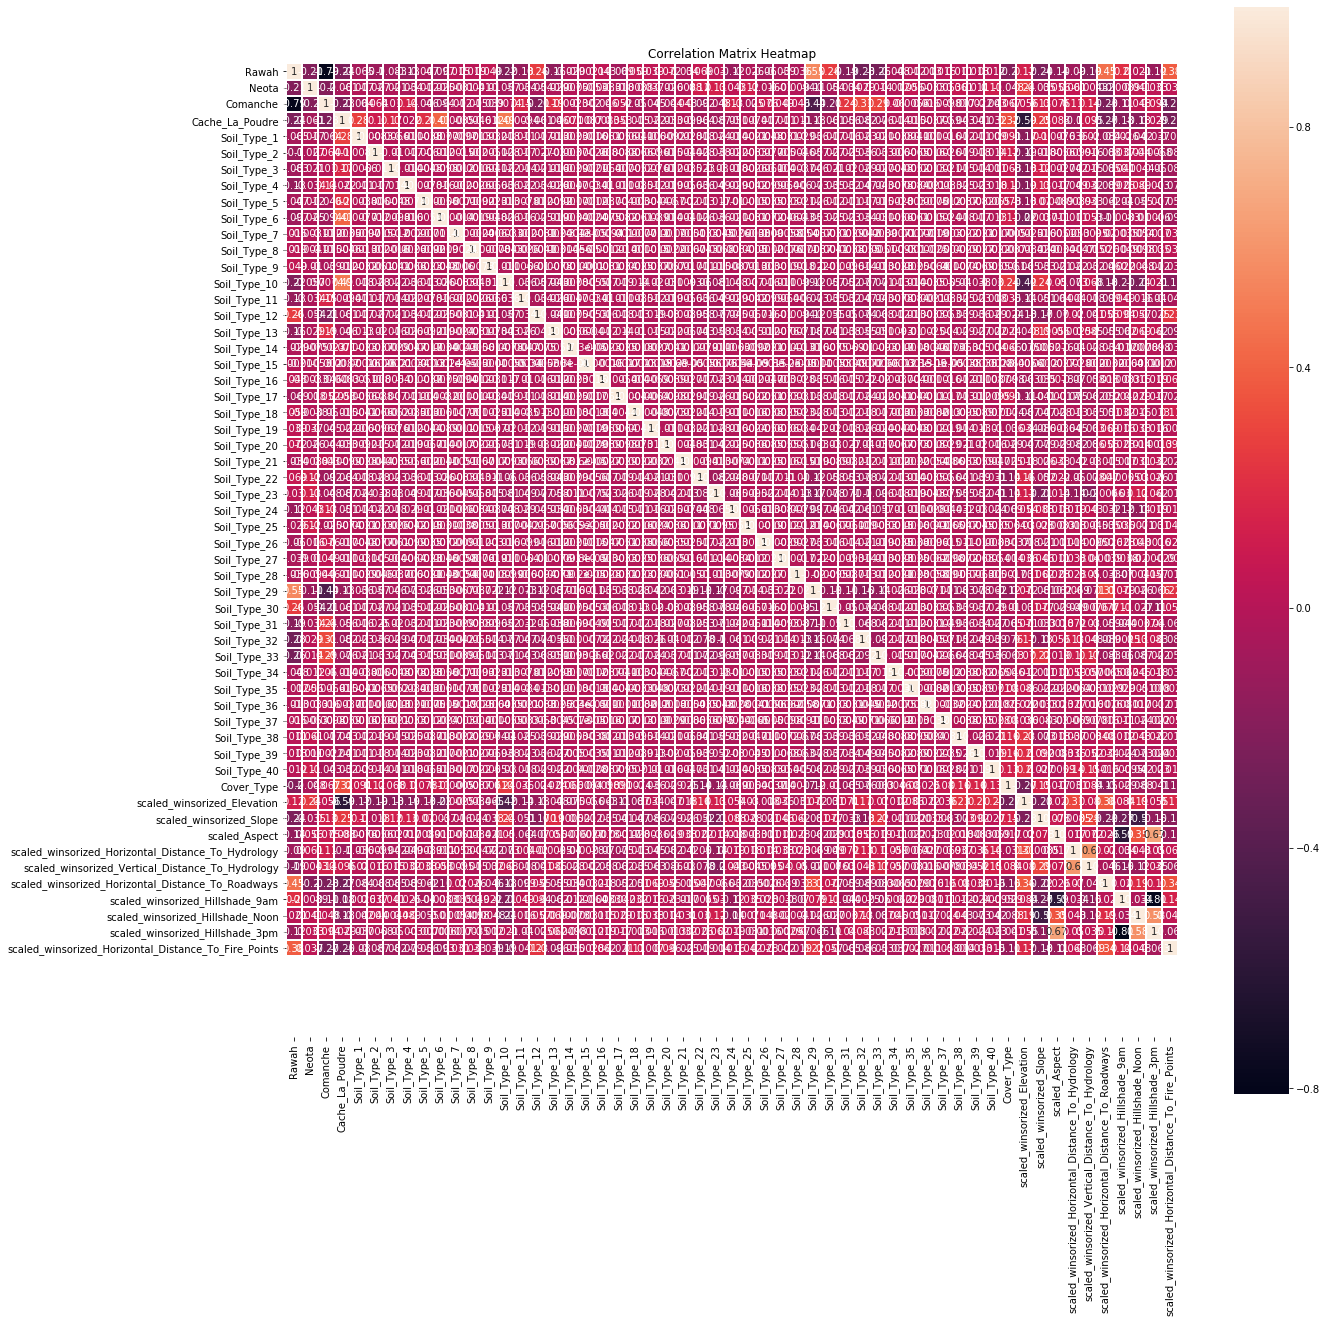

In [37]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df_win.corr(), square=True, annot=True, linewidths=1)
plt.ylim(60, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [38]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Cover_Type
    y = x['Cover_Type']
    x = x.drop(columns = ['Cover_Type'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            #print(item)
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Cover_Type'] = y
               
    return x

In [39]:
df_win=remove_collinear_features(df_win, 0.9)

In [40]:
df_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Rawah                                                   581012 non-null int64
Neota                                                   581012 non-null int64
Comanche                                                581012 non-null int64
Cache_La_Poudre                                         581012 non-null int64
Soil_Type_1                                             581012 non-null int64
Soil_Type_2                                             581012 non-null int64
Soil_Type_3                                             581012 non-null int64
Soil_Type_4                                             581012 non-null int64
Soil_Type_5                                             581012 non-null int64
Soil_Type_6                                             581012 non-null int64
Soil_Type_7                                             581012 non-null int64
Soil_Type_8                    

As we retained all features after applying the collinear function, I conclude that there are no variables that are strongly correlated with eachother.

I will proceed with part 2: finding the best classification model

# Part 2 : Classification Models

In [24]:
#Splitting the data of original dataframe
#Scale 2/3 features and use the scaled variables

X=df_win.drop('Cover_Type',1)
y=df_win['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


In [25]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

Dimension of Train set (435759, 54)
Dimension of Test set (145253, 54) 



### **Logistic Classifier**

In [34]:
#Logistic Classifier with ovr
start_time = time.time()
lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr_clf.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
accuracy_Test = lr_clf.score(X_test, y_test) 
accuracy_Training = lr_clf.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)

C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

--- 63.576178789138794 seconds ---
0.7152761044522317
0.7167884082715446


In [35]:
lr_clf_predictions = lr_clf.predict(X_test)

lr_clf_report = classification_report(y_test, lr_clf_predictions)


In [36]:
#Logistic Classifier with multinomial
start_time = time.time()
lr_clf_m = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_clf_m.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
accuracy_Test = lr_clf_m.score(X_test, y_test) 
accuracy_Training = lr_clf_m.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)

C:\Users\riesn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


--- 38.35513257980347 seconds ---
0.7242466592772611
0.7258645260338857


In [37]:
lr_clf_m_predictions = lr_clf_m.predict(X_test)
lr_clf_m_report = classification_report(y_test, lr_clf_m_predictions)

In [38]:
# Recap of classification reports
print('-'*10 +'Logistic Classifier with ovr'+'-'*10)
print(lr_clf_report)
print('-'*10 +'Logistic Classifier with Multinomial - df'+'-'*10)
print(lr_clf_m_report)

----------Logistic Classifier with ovr----------
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     53006
           2       0.74      0.80      0.77     70776
           3       0.62      0.84      0.71      8909
           4       0.64      0.29      0.40       651
           5       0.24      0.01      0.02      2473
           6       0.43      0.09      0.15      4373
           7       0.72      0.52      0.60      5065

    accuracy                           0.72    145253
   macro avg       0.59      0.46      0.48    145253
weighted avg       0.70      0.72      0.70    145253

----------Logistic Classifier with Multinomial - df----------
              precision    recall  f1-score   support

           1       0.71      0.70      0.71     53006
           2       0.75      0.80      0.77     70776
           3       0.66      0.81      0.73      8909
           4       0.56      0.39      0.46       651
           5       0.

In [39]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

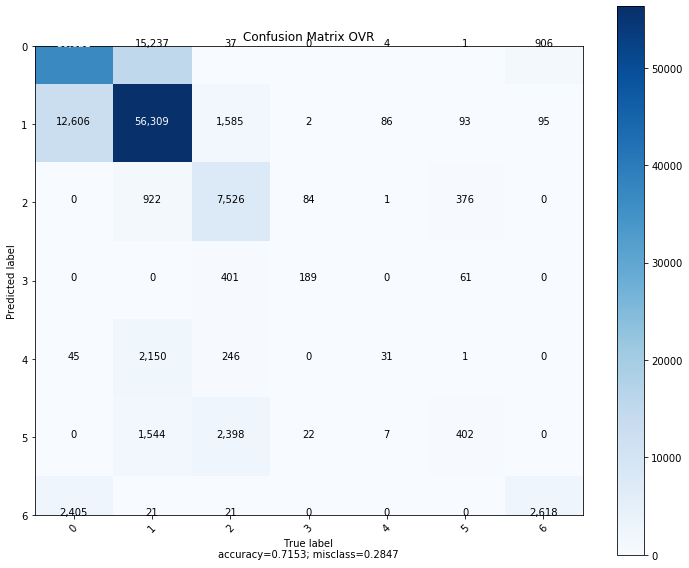

In [40]:
#Confusion Matrixes
confusion = confusion_matrix(y_test, lr_clf.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(7)], title = 'Confusion Matrix OVR',normalize=False)


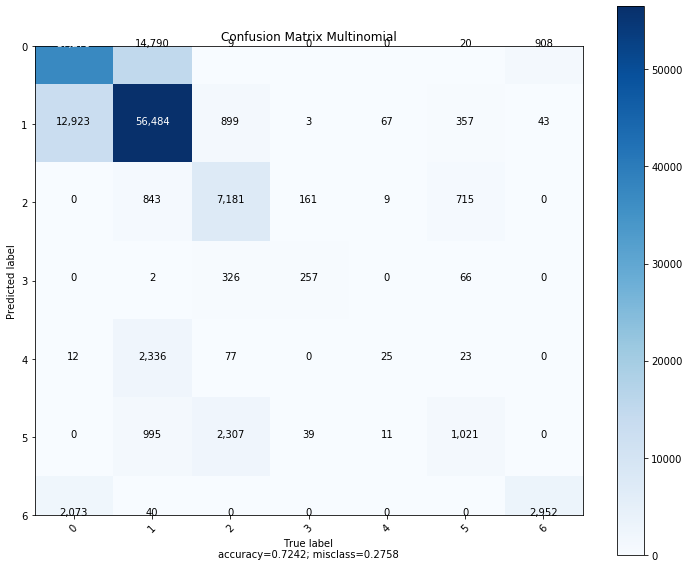

In [41]:
#Confusion Matrixes
confusion = confusion_matrix(y_test, lr_clf_m.predict(X_test))
plot_confusion_matrix(cm=confusion, target_names=[i for i in range(7)], title = 'Confusion Matrix Multinomial',normalize=False)


#### Logistic Classifier models, regardless of parameters aren't performing well. Logistic Classifier with multiclass parameter set to 'ovr' performs worse than when it is set to 'multinomial'.

### **KNN Classifer**

In [42]:
# KNN classifier with original data set
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy_Test = knn.score(X_test, y_test) 
accuracy_Training = knn.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.9243939884202047
0.9534949364212787
--- 486.07748436927795 seconds ---


In [43]:
knn_predictions = knn.predict(X_test)
knn_report = classification_report(y_test, knn_predictions)

In [44]:
# KNN classifier with original data set and weight parameter = distance
start_time = time.time()
knn_d = KNeighborsClassifier(n_neighbors = 5,weights='distance').fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy_Test = knn_d.score(X_test, y_test) 
accuracy_Training = knn_d.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.9295711620414037
1.0
--- 458.8525958061218 seconds ---


In [46]:
knn_d_predictions = knn_d.predict(X_test)
knn_d_report = classification_report(y_test, knn_d_predictions)

In [47]:
# KNN classifier with original data set and weight parameter = distance and k=7
start_time = time.time()
knn_d_7 = KNeighborsClassifier(n_neighbors = 7,weights='distance').fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy_Test = knn_d_7.score(X_test, y_test) 
accuracy_Training = knn_d_7.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.9272166495700606
1.0
--- 582.648035287857 seconds ---


In [48]:
knn_d_7_predictions = knn_d_7.predict(X_test)
knn_d_7_report = classification_report(y_test, knn_d_7_predictions)

In [49]:
# KNN classifier with original data set and weight parameter = distance and k=3
start_time = time.time()
knn_d_3 = KNeighborsClassifier(n_neighbors = 3,weights='distance').fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy_Test = knn_d_3.score(X_test, y_test) 
accuracy_Training = knn_d_3.score(X_train, y_train) 
print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.9312372205737575
1.0
--- 315.2763731479645 seconds ---


In [50]:
knn_d_3_predictions = knn_d_3.predict(X_test)
knn_d_3_report = classification_report(y_test, knn_d_3_predictions)

In [51]:
# Recap of classification reports
print('-'*10 +'KNN Classifier with k=5'+'-'*10)
print(knn_report)
print('-'*10+'KNN Classifier with distance parameter and k=5'+'-'*10)
print(knn_d_report)
print('-'*10+'KNN Classifier with distance parameter and k=7'+'-'*10)
print(knn_d_7_report)
print('-'*10+'KNN Classifier with distance parameter and k=3'+'-'*10)
print(knn_d_3_report)

----------KNN Classifier with k=5----------
              precision    recall  f1-score   support

           1       0.93      0.92      0.93     53006
           2       0.93      0.94      0.94     70776
           3       0.89      0.91      0.90      8909
           4       0.80      0.74      0.77       651
           5       0.84      0.75      0.79      2473
           6       0.81      0.78      0.80      4373
           7       0.94      0.94      0.94      5065

    accuracy                           0.92    145253
   macro avg       0.88      0.85      0.87    145253
weighted avg       0.92      0.92      0.92    145253

----------KNN Classifier with distance parameter and k=5----------
              precision    recall  f1-score   support

           1       0.94      0.93      0.93     53006
           2       0.94      0.95      0.94     70776
           3       0.90      0.91      0.91      8909
           4       0.81      0.75      0.78       651
           5       0.

#### For this experiment, the KNN with the weight parameter set to distance is the best performer.

#### In contrast with Logisitic Classifier, KNN is performing much better with 93% plus accuracy on the test set. However it is slower to run, 143+ seconds vs 25+ seconds.

#### Furthermore, increasing k to 7 didn't improve the performance, it decreased it slightly and slowed the model by 70seconds. However changing k to 3 improved performance and speed


### Decision Tree and Random Forest

In [52]:
#Decision Tree
start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=10,
    max_depth=30,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

accuracy_Test=decision_tree.score(X_test,y_test)
accuracy_Training=decision_tree.score(X_train,y_train)

print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.8767873985391007
0.9543715677702583
--- 4.783932209014893 seconds ---


In [53]:
dt_predictions = decision_tree.predict(X_test)
dt_report = classification_report(y_test, dt_predictions)
print(dt_report)

              precision    recall  f1-score   support

           1       0.88      0.85      0.87     53006
           2       0.88      0.91      0.89     70776
           3       0.88      0.87      0.88      8909
           4       0.75      0.76      0.76       651
           5       0.76      0.66      0.70      2473
           6       0.80      0.77      0.78      4373
           7       0.93      0.92      0.92      5065

    accuracy                           0.88    145253
   macro avg       0.84      0.82      0.83    145253
weighted avg       0.88      0.88      0.88    145253



In [54]:
#Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=24)
rfc.fit(X_train, y_train)

accuracy_Test=rfc.score(X_test,y_test)
accuracy_Training=rfc.score(X_train,y_train)

print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.9489304868057803
0.9997131441920878
--- 65.03694486618042 seconds ---


In [55]:
rfc_predictions = rfc.predict(X_test)
rfc_report = classification_report(y_test, rfc_predictions)
print(rfc_report)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     53006
           2       0.95      0.97      0.96     70776
           3       0.93      0.96      0.94      8909
           4       0.90      0.83      0.86       651
           5       0.93      0.75      0.83      2473
           6       0.93      0.87      0.90      4373
           7       0.97      0.94      0.96      5065

    accuracy                           0.95    145253
   macro avg       0.94      0.89      0.91    145253
weighted avg       0.95      0.95      0.95    145253



In [57]:
predictions_dictionary = { 'Random Forest' : rfc_predictions,'Actual': y_test}

predictions_df = pd.DataFrame(predictions_dictionary)
predictions_df.head(10)

,Random Forest,Actual
250728,1,1
246788,2,2
407714,2,2
25713,2,2
21820,2,2
251274,3,3
52354,2,2
246168,1,1
477113,2,2
78834,2,2


### Applying Gradient Boosting

In [65]:
params = {'n_estimators': 100,
          'max_depth': 4,
        'learning_rate':0.1,
         'subsample': 1,
         'min_samples_split': 2}
start_time = time.time()
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

accuracy_Test=clf.score(X_test, y_test)
accuracy_Training=clf.score(X_train, y_train)

print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.8022209524071792
0.8066362370025634
--- 1057.663413286209 seconds ---


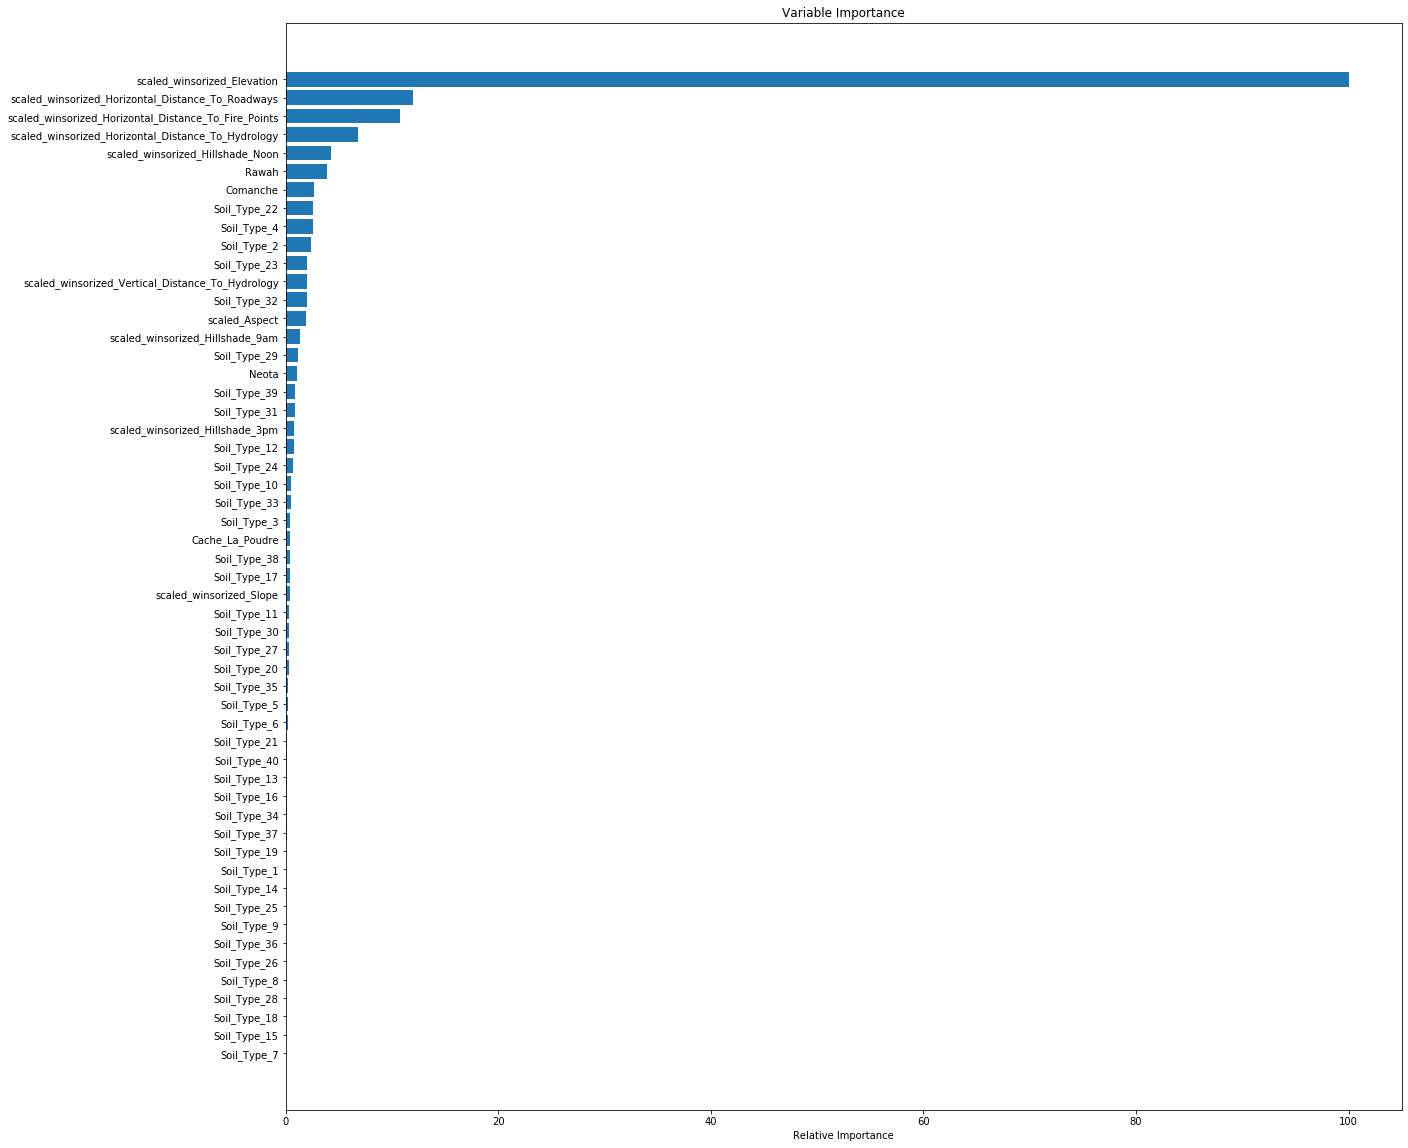

In [66]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

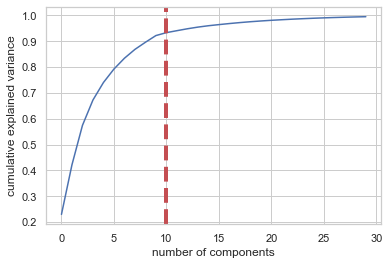

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.229888,0.229888
1,0.421646,0.191759
2,0.574082,0.152436
3,0.672224,0.098142
4,0.739925,0.067701
5,0.791973,0.052048
6,0.833804,0.041831
7,0.868036,0.034232
8,0.895586,0.027550
9,0.921512,0.025926


In [67]:
# Applying PCA to try to ipmrove performance

pca_test = PCA(n_components=30)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

In [68]:
pca = PCA(n_components=20)
pca.fit(X)
X_train_scaled_pca = pca.transform(X)

In [69]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_scaled_pca,y, test_size=0.40, random_state=42)


In [70]:
#Trying with PCA and different parameters to see if improves performance

params = {'n_estimators': 100,
          'max_depth': 3,
        'learning_rate':0.1,
         'subsample': 1,
         'min_samples_split': 2}
start_time = time.time()
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train_pca)

accuracy_Test=clf.score(X_test_pca, y_test_pca)
accuracy_Training=clf.score(X_train_pca, y_train_pca)

print(accuracy_Test) 
print(accuracy_Training)
print("--- %s seconds ---" % (time.time() - start_time))

0.7650954153309955
0.7714790580797287
--- 1405.320026397705 seconds ---


Using PCA has not improved the model and execution time is still very long.

#### Random Forest model performs the best accross all models tested. It runs fast and with the highest accuracy score on the test set. It doesn't have the best score on the training of all models: KNN performed slightely better with 100% accuracy on the training data but the gain in spead and accuracy on test data outweights the drawback. 

In [72]:
#Final run through of best model with cross validation
rf_clf = RandomForestClassifier(n_estimators=24)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))

Accuracy scores for the 5 folds:  [0.94259521 0.9400817  0.94239949 0.94245686 0.94240964]
Mean cross validation score: 0.942


In [73]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(10)
#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

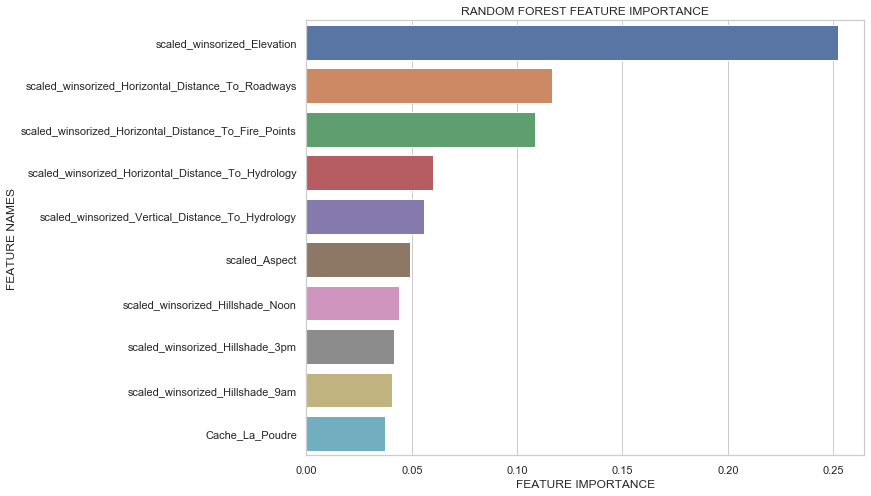

In [74]:
plot_feature_importance(rfc.feature_importances_,X.columns,'RANDOM FOREST')

# Conclusion

Through EDA and supervised learning modeling, I have been able to determine that Random Forest is the best model to predict the cover type variable. 
The most important features in determining the type of cover are:
- Elevation
- Horizontal_Distance_to_Roadway
- Horizontal_Distance_to_Firepoints

Limitations of the data:

- this data is gathered only over the area of the Roosevelt National Forest area in Colorado. The attributes of this area (soil types, sun exposures, elevation..) are very specific to this area. 
- We don't have information on the timeline over which this data was gathered (over months/ years...?) which introduces a nuance around global warming effects on the environment and changing the relationship between plant species and nutrients in the earth.

Future development:
- try more parameter tuning to improve boosting models
- gather similar data on other forests around the world and in other climates (tropical or arid) and conduct similar analysis
- gather more variables in this data set such as weather events (fires/storms) that could impact the development of cover types